In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow.keras import regularizers

In [3]:
ds_train , info = tfds.load('beans', split='train', shuffle_files=True, with_info=True)
ds_test = tfds.load('beans', split='train', shuffle_files=True)
ds_valid = tfds.load('beans', split='validation', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteCT35Z7/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteCT35Z7/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteCT35Z7/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [4]:
 info.features

FeaturesDict({
    'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})

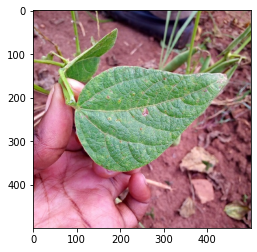

1
tf.Tensor([500 500   3], shape=(3,), dtype=int32)


In [5]:
for index, a in enumerate(ds_train):
    plt.imshow(a['image'])
    plt.show()
    print(a['label'].numpy())
    print(tf.shape(a['image']))

    if index >=0: 
        break

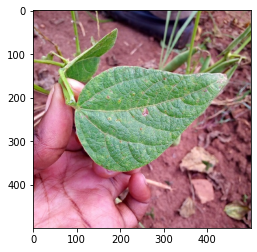

1
tf.Tensor([500 500   3], shape=(3,), dtype=int32)


In [6]:
for index, a in enumerate(ds_test):
    plt.imshow(a['image'])
    plt.show()
    print(a['label'].numpy())
    print(tf.shape(a['image']))
    if index >=0: 
        break

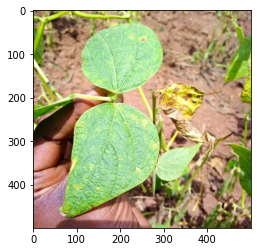

1
tf.Tensor([500 500   3], shape=(3,), dtype=int32)


In [7]:
for index, a in enumerate(ds_valid):
    plt.imshow(a['image'])
    plt.show()
    print(a['label'].numpy())
    print(tf.shape(a['image']))

    if index >=0: 
        break

In [8]:
def augment_hue(tensor):
    return tf.image.resize(tensor['image'], (299,299)), tensor['label']

def normalize_image(image, label):
    return image / 255.0 , label

In [9]:
resized_dataset_train = ds_train.map(map_func=augment_hue)
normalized_dataset_train = resized_dataset_train.map(map_func=normalize_image)

In [10]:
resized_dataset_test = ds_test.map(map_func=augment_hue)
normalized_dataset_test = resized_dataset_test.map(map_func=normalize_image)

In [11]:
resized_dataset_valid = ds_valid.map(map_func=augment_hue)
normalized_dataset_valid = resized_dataset_valid.map(map_func=normalize_image)

In [51]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=20, kernel_size=(5,5), strides=1, input_shape=(299,299,3),  activation='tanh', padding='valid'), 
    keras.layers.AveragePooling2D(pool_size=(2,2)), 
    keras.layers.Conv2D(filters=36, kernel_size=(5,5), strides=1, activation='tanh', padding='valid'), 
    keras.layers.AveragePooling2D(pool_size=(2,2)), 
    keras.layers.Conv2D(140,(5,5), activation='tanh'),
    keras.layers.Dropout(.2),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='tanh'), 
    keras.layers.Dense(3, activation='softmax')
])

#lenet_5_model.summary()

In [52]:
lenet_5_model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [53]:
BATCH_SIZE = 10
dataset = normalized_dataset_train.repeat().batch(BATCH_SIZE)
lenet_5_model.fit(dataset, steps_per_epoch=len(ds_train)/BATCH_SIZE, epochs=3)

Epoch 1/3
103/103 [==============================] - 323s 3s/step - loss: 3.3898 - accuracy: 0.3058
Epoch 2/3
103/103 [==============================] - 273s 3s/step - loss: 1.1133 - accuracy: 0.3375
Epoch 3/3
103/103 [==============================] - 273s 3s/step - loss: 1.1062 - accuracy: 0.3548


In [15]:
BATCH_SIZE = 10
dataset_test = normalized_dataset_test.batch(BATCH_SIZE)
test_loss,test_accuracy = lenet_5_model.evaluate(dataset_test,verbose=2)

104/104 - 29s - loss: 1.0995 - accuracy: 0.3172 - 29s/epoch - 282ms/step


In [ ]:
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
x = inception.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(84, activation='tanh')(x)
output = keras.layers.Dense(3, activation='softmax')(x)
inceptoin_model = keras.models.Model(inputs=inception.input, outputs=output)

In [ ]:
for i in inception.layers:
    i.trainable = False

In [ ]:
keras.backend.clear_session()
inceptoin_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 10
dataset = normalized_dataset_train.repeat().batch(BATCH_SIZE)
inceptoin_model.fit(dataset, steps_per_epoch=len(ds_train)/BATCH_SIZE, epochs=10)

Epoch 1/10
103/103 [==============================] - 203s 2s/step - loss: 0.7555 - accuracy: 0.7029
Epoch 2/10
103/103 [==============================] - 199s 2s/step - loss: 0.4252 - accuracy: 0.8346
Epoch 3/10
103/103 [==============================] - 198s 2s/step - loss: 0.3255 - accuracy: 0.8712
Epoch 4/10
103/103 [==============================] - 199s 2s/step - loss: 0.2709 - accuracy: 0.8971
Epoch 5/10
103/103 [==============================] - 199s 2s/step - loss: 0.2281 - accuracy: 0.9144
Epoch 6/10
103/103 [==============================] - 199s 2s/step - loss: 0.1731 - accuracy: 0.9423
Epoch 7/10
103/103 [==============================] - 199s 2s/step - loss: 0.1561 - accuracy: 0.9519
Epoch 8/10
103/103 [==============================] - 198s 2s/step - loss: 0.1135 - accuracy: 0.9663
Epoch 9/10
103/103 [==============================] - 200s 2s/step - loss: 0.1002 - accuracy: 0.9740
Epoch 10/10
103/103 [==============================] - 199s 2s/step - loss: 0.0897 - accura

In [ ]:
BATCH_SIZE = 10
dataset_test = normalized_dataset_test.batch(BATCH_SIZE)
test_loss,test_accuracy = inceptoin_model.evaluate(dataset_test,verbose=2)

104/104 - 198s - loss: 0.0952 - accuracy: 0.9739 - 198s/epoch - 2s/step
